In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

/home/diego/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Limpieza en masa de duplicados

In [75]:
ruta = "../data/clean/*.csv"
archivos = glob.glob(ruta)

MIN_DELTA = 1
MAX_DELTA = 5

In [ ]:
for archivo in archivos:
    print("Procesando:", archivo)

    df = pd.read_csv(archivo)
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.sort_values("timestamp").reset_index(drop=True)

    # Paso 1: eliminar duplicados exactos (timestamp + evento)
    df = df.drop_duplicates(subset=["timestamp", "evento"], keep="first")

    # Paso 2: eliminar duplicados con < 5 segundos de desfase
    diffs = df["timestamp"].diff().dt.total_seconds().fillna(9999)

    # Crear mascara y eliminar
    mask = (diffs > MIN_DELTA) & (diffs < MAX_DELTA)

    df = df[~mask].reset_index(drop=True)

    # Guardar archivos
    nuevo = archivo.replace(".csv", "_clean.csv")
    df.to_csv(nuevo, index=False)
    print("Guardado:", nuevo)


Limpieza enfocada (Timestamp duplicado, evento distinto)

In [2]:
df = pd.read_csv("../data/clean/day_1_cleanest.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  104 non-null    object
 1   evento     104 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [ ]:
df["timestamp"].value_counts()[lambda x: x > 1]

Duplicados Timestamp

In [78]:
duplicados = df[df["timestamp"].duplicated(keep=False)].sort_values("timestamp")

duplicados

,timestamp,evento


Revision Manual de video

In [212]:
df = df.drop(62)

In [214]:
df.to_csv("../data/clean/day_22_cleanest.csv", index=False)

Borrar columnas

In [5]:
for archivo in archivos:
    print("Borrado de columnas:", archivo)
    df = pd.read_csv(archivo)
    columnas_borrar = ["frame_idx", "track_id", "clase", "cx", "cy", "x1", "x2", "y1", "y2"]
    df = df.drop(columns=[c for c in columnas_borrar if c in df.columns])

    df.to_csv(archivo, index=False)
    print("Columnas borradas")

NameError: name 'archivos' is not defined

Build graphics

<Figure size 500x1200 with 0 Axes>

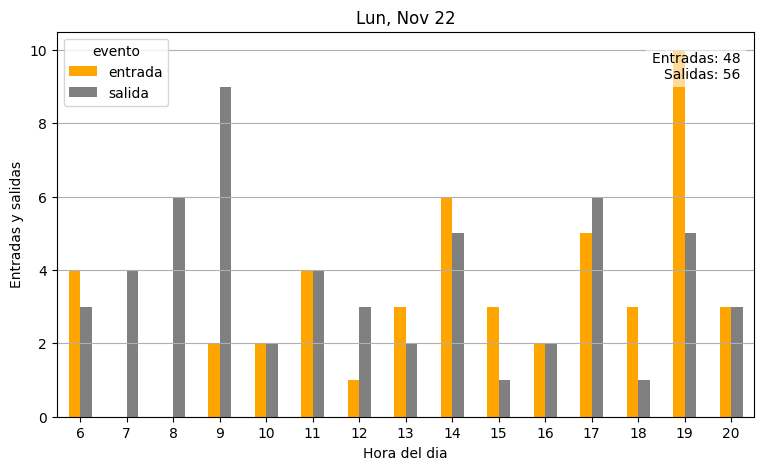

In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hora"] = df["timestamp"].dt.hour
conteo = df.groupby(["hora", "evento"]).size().unstack(fill_value=0)

plt.figure(figsize=(5,12))

conteo.plot(
    kind="bar",
    figsize=(9,5),
    color={"entrada": "orange", "salida": "grey"},
)

plt.xlabel("Hora del dia")
plt.ylabel("Entradas y salidas")
plt.title("Lun, Dec 01")
plt.xticks(rotation=0)
plt.grid(axis="y")

plt.savefig("../graph/day22", dpi=300, bbox_inches="tight")
plt.show()